In [84]:
import pandas as pd
import numpy as np

In [85]:
df=pd.read_csv('/content/test_class.csv')
df

,Roll Number,Name,2025-06-07,2025-06-08,2025-06-09,2025-06-10,2025-06-11,2025-06-12,2025-06-13,2025-06-14,2025-06-15,2025-06-16
0,100,Student 1,P,P,NaN,NaN,P,P,P,P,P,NaN
1,101,Student 2,P,P,NaN,NaN,NaN,NaN,P,NaN,NaN,P
2,102,Student 3,NaN,P,P,NaN,P,P,P,NaN,P,P
3,103,Student 4,NaN,P,P,NaN,NaN,P,NaN,NaN,P,NaN
4,104,Student 5,NaN,P,P,P,NaN,P,NaN,P,NaN,P
5,105,Student 6,P,NaN,NaN,P,NaN,P,NaN,NaN,NaN,P
6,106,Student 7,P,NaN,P,P,P,P,P,P,NaN,P
7,107,Student 8,P,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,P
8,108,Student 9,NaN,P,NaN,P,NaN,P,NaN,P,P,P
9,109,Student 10,P,NaN,P,NaN,P,NaN,NaN,P,P,NaN


In [86]:
# Q1: How many students were present on 2025-06-14?
present_0614 = df['2025-06-14'].value_counts().get('P', 0)
present_0614

np.int64(5)

In [87]:
# Q2: Has roll number 101 attended on 2025-06-14?
attended_101_0614 = df.loc[df['Roll Number'] == 101, '2025-06-14'].values[0] == 'P'

attended_101_0614

False

In [88]:
# Q3: How many total lectures has roll number 102 attended?
lectures_102 = (df[df['Roll Number'] == 102].iloc[0].drop(['Roll Number', 'Name']) == 'P').sum()
lectures_102

np.int64(7)

In [89]:
# Q4: List students who were present on 2025-06-15
present_0615 = df[df['2025-06-15'] == 'P'][['Roll Number', 'Name']]
present_0615

,Roll Number,Name
0,100,Student 1
2,102,Student 3
3,103,Student 4
8,108,Student 9
9,109,Student 10


In [90]:
# Q5: Total number of lectures conducted
total_lectures = len([col for col in df.columns if col not in ['Roll Number', 'Name']])
total_lectures

10

In [91]:
# Q6: What percentage of students were present on 2025-06-14?
percentage_present_0614 = (present_0614 / len(df)) * 100
percentage_present_0614


np.float64(50.0)

In [92]:
# Q7: List all dates student 105 was present
dates_present_105 = (
    df[df['Roll Number'] == 105]
    .iloc[0]
    .drop(['Roll Number', 'Name'])
    .loc[lambda x: x == 'P']
    .index
    .tolist()
)
dates_present_105

['2025-06-07', '2025-06-10', '2025-06-12', '2025-06-16']

In [93]:
# Q8: Show students absent on 2025-06-15
absent_0615 = df[df['2025-06-15'] != 'P'][['Roll Number', 'Name']]
absent_0615

,Roll Number,Name
1,101,Student 2
4,104,Student 5
5,105,Student 6
6,106,Student 7
7,107,Student 8


In [94]:
# Q9: Show attendance summary for all students
attendance_summary = df.drop(columns=['Roll Number', 'Name']).eq('P').sum(axis=1)

attendance_summary

,0
0,7
1,4
2,7
3,4
4,6
5,4
6,8
7,3
8,6
9,5


In [95]:
# Q10: Who has full attendance?
full_attendance = df[df.drop(columns=['Roll Number', 'Name']).eq('P').all(axis=1)][['Roll Number', 'Name']]
full_attendance

,Roll Number,Name


In [96]:

# Q11: Who has lowest attendance?
lowest_attendance = df.assign(total=df.drop(columns=['Roll Number', 'Name']).eq('P').sum(axis=1))\
                      .sort_values('total')\
                      .head(1)[['Roll Number', 'Name']]

lowest_attendance

,Roll Number,Name
7,107,Student 8


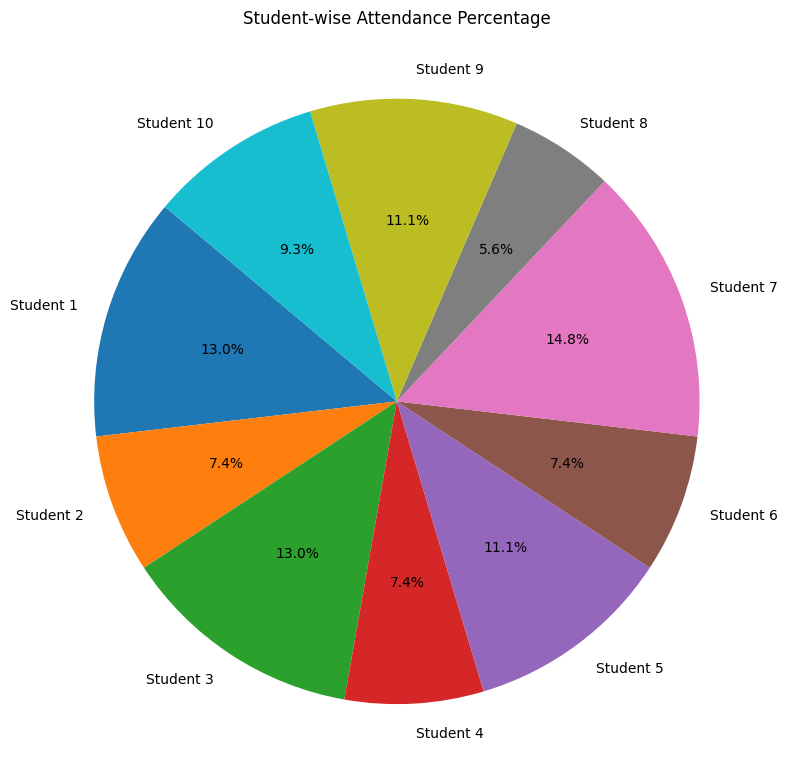

In [97]:
#Q: Can you visualize the overall attendance distribution among students using a pie chart?
import matplotlib.pyplot as plt

# Attendance summary for all students (number of 'P's)
summary = df.drop(columns=['Roll Number', 'Name']).eq('P').sum(axis=1)
labels = df['Name']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(summary, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Student-wise Attendance Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [98]:
#Q: Which date had the highest student attendance?
# Count 'P' for each date
attendance_by_date = df.drop(columns=['Roll Number', 'Name']).apply(lambda col: col.eq('P').sum(), axis=0)
max_date = attendance_by_date.idxmax()
max_present = attendance_by_date.max()
print(f"Highest attendance was on {max_date} with {max_present} students present.")


Highest attendance was on 2025-06-12 with 7 students present.


In [99]:
#Q: What is the average attendance per student?

# Calculate mean of number of 'P' for each student
average_attendance = df.drop(columns=['Roll Number', 'Name']).eq('P').sum(axis=1).mean()
print(f"Average attendance per student is {average_attendance:.2f} lectures.")


Average attendance per student is 5.40 lectures.


In [100]:
#Q4: Which lecture date had the lowest attendance percentage?
# Calculate percentage attendance per date
lowest_attendance_date = attendance_by_date.idxmin()
lowest_percentage = (attendance_by_date.min() / len(df)) * 100
print(f"Lowest attendance was on {lowest_attendance_date} with {lowest_percentage:.1f}% students present.")


Lowest attendance was on 2025-06-10 with 40.0% students present.


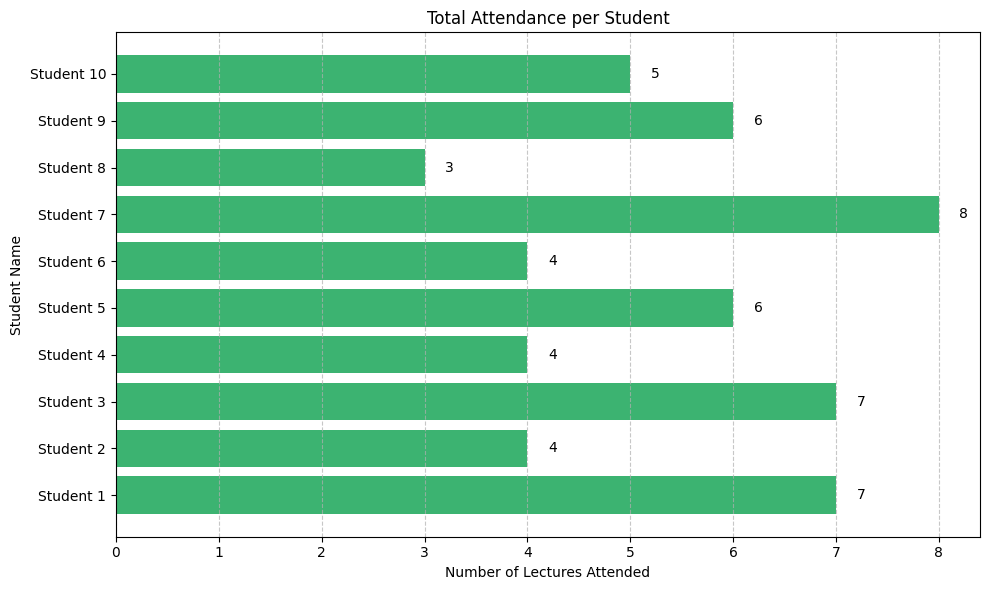

In [104]:
import matplotlib.pyplot as plt

# Calculate total attendance per student
# Identify date columns dynamically
date_columns = df.columns.drop(['Roll Number', 'Name'])
df['Total Attended'] = df[date_columns].eq('P').sum(axis=1)

# Prepare data for visualization
names = df['Name']
attendance = df['Total Attended']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(names, attendance, color='mediumseagreen')
plt.title('Total Attendance per Student')
plt.xlabel('Number of Lectures Attended')
plt.ylabel('Student Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the attendance value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.show()